# Feature engineering on NCAA data

Domain knowledge is critical to getting the best out of data analysis and machine learning.
In the case of basketball, Dean Oliver identified four factors that are critical to success:
* Shooting
* Turnovers
* Rebounding
* Free Throws

Of course, it is not enough to identify factors, you need a way to measure them.

Read [this article](https://www.basketball-reference.com/about/factors.html) about the four factors and how they are measured. In this notebook, we will compute them from the box score data.

## Shooting efficiency

Shooting is measured as the fraction of field goal attempts made, weighting 3 points higher:

$(FG + 0.5 * 3P) / FGA$

Let's compute the offensive and defensive shooting efficiency and see how correlated they are to winning teams.

See [%%bigquery documentation](https://googleapis.github.io/google-cloud-python/latest/bigquery/magics.html) for how to use it.

In [1]:
%%bigquery df1
SELECT 
  team_code,
  AVG(SAFE_DIVIDE(fgm + 0.5 * fgm3,fga+fga3)) AS offensive_efficiency,
  AVG(SAFE_DIVIDE(opp_fgm + 0.5 * opp_fgm3,opp_fga+opp_fga3)) AS opponents_efficiency,
  AVG(win) AS win_rate,
  COUNT(win) AS num_games
FROM lab_dev.team_box
WHERE fga IS NOT NULL
GROUP BY team_code

,team_code,offensive_efficiency,opponents_efficiency,win_rate,num_games
0,272,0.351645,0.381127,0.426626,661
1,632,0.337531,0.377332,0.429664,654
2,178,0.345909,0.372409,0.320840,667
3,504980,0.331039,0.426033,0.000000,25
4,183,0.394979,0.387506,0.476190,504
5,28,0.372274,0.373015,0.548433,702
6,483,0.366435,0.390427,0.443769,658
7,7,0.346091,0.378247,0.413445,595
8,664,0.368561,0.357884,0.520000,675
9,204,0.364465,0.341558,0.530864,729


Let's remove the entries corresponding to teams that played fewer than 100 games, and then plot it.

In [2]:
df1 = df1[df1['num_games'] > 100]

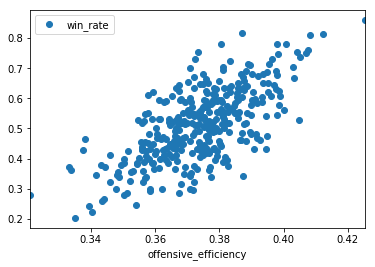

In [3]:
df1.plot(x='offensive_efficiency', y='win_rate', style='o');

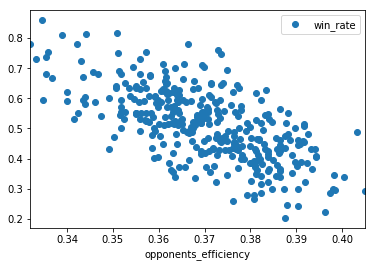

In [4]:
df1.plot(x='opponents_efficiency', y='win_rate', style='o');

Does the relationship make sense? Do you think offensive and defensive efficiency are good predictors of a team's performance?

## Turnover Percentage

Turnover percentage is measured as:

$TOV / (FGA + 0.44 * FTA + TOV)$

As before, let's compute this, and see whether it is a good predictor. For simplicity, we will compute only offensive turnover percentage, although we should really compute both sides as we did for scoring efficiency.

In [5]:
%%bigquery df2
SELECT 
  team_code,
  AVG(SAFE_DIVIDE(tov,fga+0.44*fta+tov)) AS turnover_percent,
  AVG(win) AS win_rate,
  COUNT(win) AS num_games
FROM lab_dev.team_box
WHERE fga IS NOT NULL
GROUP BY team_code
HAVING num_games > 100

,team_code,turnover_percent,win_rate,num_games
0,272,0.171905,0.426626,661
1,632,0.185153,0.429664,654
2,178,0.172217,0.320840,667
3,183,0.178478,0.476190,504
4,28,0.154335,0.548433,702
5,483,0.179728,0.443769,658
6,7,0.172174,0.413445,595
7,664,0.161340,0.520000,675
8,204,0.160612,0.530864,729
9,229,0.162820,0.382309,667


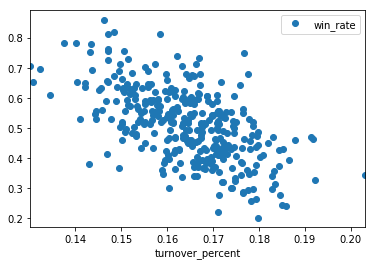

In [6]:
df2.plot(x='turnover_percent', y='win_rate', style='o');

## Rebounding

Again, we'd have to measure both sides, but for simplicity, we'll do only the offensive rebounds.

$ORB / (ORB + Opp DRB)$

In [7]:
%%bigquery df3
SELECT 
  team_code,
  AVG(SAFE_DIVIDE(oreb,oreb + opp_dreb)) AS rebounding,
  AVG(win) AS win_rate,
  COUNT(win) AS num_games
FROM lab_dev.team_box
WHERE fga IS NOT NULL
GROUP BY team_code
HAVING num_games > 100

,team_code,rebounding,win_rate,num_games
0,272,0.241530,0.426626,661
1,632,0.293107,0.429664,654
2,178,0.297945,0.320840,667
3,183,0.245612,0.476190,504
4,28,0.283190,0.548433,702
5,483,0.276217,0.443769,658
6,7,0.336807,0.413445,595
7,664,0.287098,0.520000,675
8,204,0.322037,0.530864,729
9,229,0.291606,0.382309,667


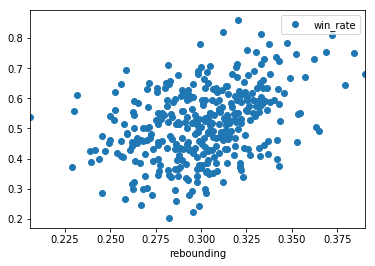

In [8]:
df3.plot(x='rebounding', y='win_rate', style='o');

The relationship doesn't seem all that strong here. One way to measure the strength of the relationship is through the correlation. Numbers near 0 mean not correlated and numbers near +/- 1 indicate high correlation:

In [9]:
df3.corr()['win_rate']

team_code     0.054005
rebounding    0.377354
win_rate      1.000000
num_games     0.464207
Name: win_rate, dtype: float64

The correlation between rebounding and win_rate is 0.38.  Compare that to the first data frame:

In [10]:
df1.corr()['win_rate']

team_code               0.054005
offensive_efficiency    0.675964
opponents_efficiency   -0.659080
win_rate                1.000000
num_games               0.464207
Name: win_rate, dtype: float64

Notice that the offensive and opponents efficiency have correlation of 0.67 and -0.66, which are higher.

In [11]:
df2.corr()['win_rate']

team_code           0.054005
turnover_percent   -0.587774
win_rate            1.000000
num_games           0.464207
Name: win_rate, dtype: float64

## Free throw factor

This is a measure of both how often a team gets to the line and how often they make them:

$FT / FGA$


In [12]:
%%bigquery df3
SELECT 
  team_code,
  AVG(SAFE_DIVIDE(ftm,fga+fga3)) AS freethrows,
  AVG(win) AS win_rate,
  COUNT(win) AS num_games
FROM lab_dev.team_box
WHERE fga IS NOT NULL
GROUP BY team_code
HAVING num_games > 100

,team_code,freethrows,win_rate,num_games
0,272,0.170299,0.426626,661
1,632,0.172547,0.429664,654
2,178,0.165298,0.320840,667
3,183,0.186623,0.476190,504
4,28,0.208634,0.548433,702
5,483,0.201401,0.443769,658
6,7,0.186901,0.413445,595
7,664,0.194024,0.520000,675
8,204,0.206700,0.530864,729
9,229,0.172908,0.382309,667


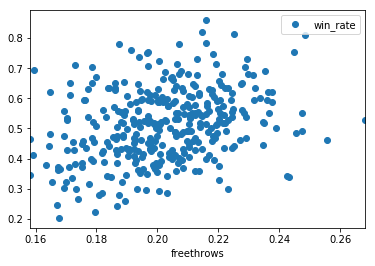

In [13]:
df3.plot(x='freethrows', y='win_rate', style='o');

In [14]:
df3.corr()['win_rate']

team_code     0.054005
freethrows    0.307014
win_rate      1.000000
num_games     0.464207
Name: win_rate, dtype: float64

## Machine Learning

Let's use these factors to create a simple ML model

In [19]:
%%bigquery
SELECT 
  team_code,
  is_home,
  SAFE_DIVIDE(fgm + 0.5 * fgm3,fga+fga3) AS offensive_efficiency,
  SAFE_DIVIDE(opp_fgm + 0.5 * opp_fgm3,opp_fga+opp_fga3) AS opponents_efficiency,
  SAFE_DIVIDE(tov,fga+0.44*fta+tov) AS turnover_percent,
  SAFE_DIVIDE(opp_tov,opp_fga+0.44*opp_fta+opp_tov) AS opponents_turnover_percent,
  SAFE_DIVIDE(oreb,oreb + opp_dreb) AS rebounding,
  SAFE_DIVIDE(opp_oreb,opp_oreb + dreb) AS opponents_rebounding,
  SAFE_DIVIDE(ftm,fga+fga3) AS freethrows,
  SAFE_DIVIDE(opp_ftm,opp_fga+opp_fga3) AS opponents_freethrows,
  win
FROM lab_dev.team_box
WHERE fga IS NOT NULL and win IS NOT NULL
LIMIT 10

,team_code,is_home,offensive_efficiency,opponents_efficiency,turnover_percent,opponents_turnover_percent,rebounding,opponents_rebounding,freethrows,opponents_freethrows,win
0,272,0,0.265823,0.465116,0.090253,0.277778,0.189189,0.235294,0.126582,0.558140,0
1,632,0,0.310345,0.402439,0.186782,0.309406,0.305556,0.434783,0.172414,0.585366,0
2,178,0,0.412698,0.457447,0.178359,0.265800,0.185185,0.350000,0.158730,0.617021,0
3,504980,0,0.349315,0.545455,0.165479,0.241838,0.378378,0.176471,0.191781,0.590909,0
4,183,0,0.261111,0.447917,0.123762,0.259463,0.214286,0.227273,0.111111,0.541667,0
5,28,0,0.364198,0.528846,0.088028,0.228311,0.266667,0.166667,0.135802,0.326923,0
6,183,0,0.416667,0.477778,0.341352,0.302013,0.350000,0.315789,0.129630,0.244444,0
7,183,0,0.282609,0.446809,0.190728,0.287173,0.176471,0.210526,0.144928,0.276596,0
8,183,0,0.335714,0.413043,0.294482,0.260736,0.208333,0.315789,0.085714,0.565217,0
9,183,0,0.401639,0.390000,0.186314,0.147929,0.200000,0.304348,0.163934,0.500000,0


In [23]:
%%bigquery
CREATE OR REPLACE MODEL lab_dev.four_factors_model
OPTIONS(model_type='logistic_reg', input_label_cols=['win'])
AS

SELECT 
  team_code,
  is_home,
  SAFE_DIVIDE(fgm + 0.5 * fgm3,fga+fga3) AS offensive_efficiency,
  SAFE_DIVIDE(opp_fgm + 0.5 * opp_fgm3,opp_fga+opp_fga3) AS opponents_efficiency,
  SAFE_DIVIDE(tov,fga+0.44*fta+tov) AS turnover_percent,
  SAFE_DIVIDE(opp_tov,opp_fga+0.44*opp_fta+opp_tov) AS opponents_turnover_percent,
  SAFE_DIVIDE(oreb,oreb + opp_dreb) AS rebounding,
  SAFE_DIVIDE(opp_oreb,opp_oreb + dreb) AS opponents_rebounding,
  SAFE_DIVIDE(ftm,fga+fga3) AS freethrows,
  SAFE_DIVIDE(opp_ftm,opp_fga+opp_fga3) AS opponents_freethrows,
  win
FROM lab_dev.team_box
WHERE fga IS NOT NULL and win IS NOT NULL

""


In [24]:
%%bigquery evalstats
SELECT * FROM ML.EVALUATE(MODEL lab_dev.four_factors_model)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.839405,0.843535,0.841371,0.841465,0.364191,0.919842


84% isn't bad, but ... there is a *huge* problem with the above approach.
How are we supposed to know Team A's free throw shooting percentage against Team B before the game is played?

What we could do is to get the free throw shooting percentage of Team A in the 3 games prior to this one and use that. This requires analytic functions in SQL. If you are not familar with these, make a copy of the select statement and modify it in stages until you grasp what is happening.

In [15]:
%%bigquery
CREATE OR REPLACE MODEL lab_dev.four_factors_model
OPTIONS(model_type='logistic_reg', input_label_cols=['win'])
AS

WITH all_games AS (
SELECT 
  game_date,
  team_code,
  is_home,
  SAFE_DIVIDE(fgm + 0.5 * fgm3,fga+fga3) AS offensive_efficiency,
  SAFE_DIVIDE(opp_fgm + 0.5 * opp_fgm3,opp_fga+opp_fga3) AS opponents_efficiency,
  SAFE_DIVIDE(tov,fga+0.44*fta+tov) AS turnover_percent,
  SAFE_DIVIDE(opp_tov,opp_fga+0.44*opp_fta+opp_tov) AS opponents_turnover_percent,
  SAFE_DIVIDE(oreb,oreb + opp_dreb) AS rebounding,
  SAFE_DIVIDE(opp_oreb,opp_oreb + dreb) AS opponents_rebounding,
  SAFE_DIVIDE(ftm,fga+fga3) AS freethrows,
  SAFE_DIVIDE(opp_ftm,opp_fga+opp_fga3) AS opponents_freethrows,
  win
FROM lab_dev.team_box
WHERE fga IS NOT NULL and win IS NOT NULL
)

, prevgames AS (
SELECT 
  is_home,
  AVG(offensive_efficiency) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS offensive_efficiency,
  AVG(opponents_efficiency) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING)AS opponents_efficiency,
  AVG(turnover_percent)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS turnover_percent,
  AVG(opponents_turnover_percent)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS opponents_turnover_percent,
  AVG(rebounding)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS rebounding,
  AVG(opponents_rebounding) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS opponents_rebounding,
  AVG(freethrows) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS freethrows,
  AVG(opponents_freethrows) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS oppponents_freethrows,
  win
FROM all_games
)

SELECT * FROM prevgames
WHERE offensive_efficiency IS NOT NULL

""


In [16]:
%%bigquery evalstats
SELECT * FROM ML.EVALUATE(MODEL lab_dev.four_factors_model)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.682777,0.700098,0.68818,0.691329,0.585023,0.757265


Based on just the teams' performance coming in, we can predict the outcome of games with a 68% accuracy.

## More complex ML model

We can write a more complex ML model using Keras and a deep neural network.
The code is not that hard but you'll have to do a lot more work (scaling, hyperparameter tuning)
to get better performance than you did with the BigQuery ML model.

In [17]:
%%bigquery games
WITH all_games AS (
SELECT 
  game_date,
  team_code,
  is_home,
  SAFE_DIVIDE(fgm + 0.5 * fgm3,fga+fga3) AS offensive_efficiency,
  SAFE_DIVIDE(opp_fgm + 0.5 * opp_fgm3,opp_fga+opp_fga3) AS opponents_efficiency,
  SAFE_DIVIDE(tov,fga+0.44*fta+tov) AS turnover_percent,
  SAFE_DIVIDE(opp_tov,opp_fga+0.44*opp_fta+opp_tov) AS opponents_turnover_percent,
  SAFE_DIVIDE(oreb,oreb + opp_dreb) AS rebounding,
  SAFE_DIVIDE(opp_oreb,opp_oreb + dreb) AS opponents_rebounding,
  SAFE_DIVIDE(ftm,fga+fga3) AS freethrows,
  SAFE_DIVIDE(opp_ftm,opp_fga+opp_fga3) AS opponents_freethrows,
  win
FROM lab_dev.team_box
WHERE fga IS NOT NULL and win IS NOT NULL
)

, prevgames AS (
SELECT 
  is_home,
  AVG(offensive_efficiency) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS offensive_efficiency,
  AVG(opponents_efficiency) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING)AS opponents_efficiency,
  AVG(turnover_percent)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS turnover_percent,
  AVG(opponents_turnover_percent)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS opponents_turnover_percent,
  AVG(rebounding)
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS rebounding,
  AVG(opponents_rebounding) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS opponents_rebounding,
  AVG(freethrows) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS freethrows,
  AVG(opponents_freethrows) 
       OVER(PARTITION BY team_code ORDER BY game_date ASC ROWS BETWEEN 4 PRECEDING AND 1 PRECEDING) AS oppponents_freethrows,
  win
FROM all_games
)

SELECT * FROM prevgames
WHERE offensive_efficiency IS NOT NULL

,is_home,offensive_efficiency,opponents_efficiency,turnover_percent,opponents_turnover_percent,rebounding,opponents_rebounding,freethrows,oppponents_freethrows,win
0,0,0.289773,0.435065,0.114837,0.118652,0.255814,0.312500,0.272727,0.350649,0
1,0,0.338068,0.412654,0.107219,0.122267,0.221657,0.267361,0.272727,0.272886,0
2,0,0.289773,0.437140,0.114105,0.118914,0.246537,0.321098,0.272727,0.357850,0
3,0,0.288758,0.420712,0.150383,0.117638,0.268236,0.369395,0.271510,0.350530,0
4,0,0.284023,0.405696,0.175553,0.087975,0.245949,0.396533,0.297078,0.314004,0
5,0,0.261651,0.399481,0.225058,0.111651,0.332407,0.497227,0.275771,0.399839,0
6,0,0.264826,0.377312,0.271660,0.114975,0.291667,0.508506,0.207589,0.312766,0
7,0,0.284861,0.382111,0.242570,0.166225,0.263889,0.484101,0.140625,0.261874,0
8,0,0.290486,0.386953,0.245833,0.221078,0.267677,0.491741,0.046875,0.249470,0
9,0,0.267549,0.414028,0.224733,0.185751,0.171843,0.371205,0.038462,0.180644,0


In [18]:
import tensorflow as tf
import tensorflow.keras as keras

In [19]:
nrows = len(games)
ncols = len(games.iloc[0])
ntrain = (nrows * 7) // 10
print(nrows, ncols, ntrain)

242600 10 169820


In [20]:
# 0:ntrain are the training data; remaining rows are testing
# last col is the label
train_x = games.iloc[:ntrain, 0:(ncols-1)]
train_y = games.iloc[:ntrain, ncols-1]
test_x = games.iloc[ntrain:, 0:(ncols-1)]
test_y = games.iloc[ntrain:, ncols-1]

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, input_dim=ncols-1, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
history = model.fit(train_x, train_y, epochs=5, batch_size=32)
score = model.evaluate(test_x, test_y, batch_size=512)
print(score)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
169820/169820 [==============================] - 18s 106us/sample - loss: 0.6339 - acc: 0.6501
Epoch 2/5
169820/169820 [==============================] - 16s 95us/sample - loss: 0.5982 - acc: 0.6768
Epoch 3/5
169820/169820 [==============================] - 17s 103us/sample - loss: 0.5946 - acc: 0.6803
Epoch 4/5
169820/169820 [==============================] - 17s 98us/sample - loss: 0.5936 - acc: 0.6814
Epoch 5/5
72780/72780 [==============================] - 1s 8us/sample - loss: 0.5546 - acc: 0.7119
[0.5546338268543672, 0.71189886]


With a deep neural network, we are able to get 71% accuracy using the four factors model.

In [ ]:
# Copyright 2019 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.